# Logistic Regression

<img src="https://media5.datahacker.rs/2021/01/83-1024x579.jpg">

Logistic Regression is a statistical method for modeling the relationship between a dependent binary variable and one or more independent variables. Unlike linear regression, which predicts a continuous output, logistic regression predicts the probability that a given input point belongs to a certain class. Here’s a detailed explanation of the logistic regression equation:

### Logistic Regression Equation
The core of logistic regression is the logistic function, also known as the sigmoid function. The logistic regression equation can be broken down into two parts: the linear component and the logistic function.

#### Linear Component
The linear component is similar to the linear regression model:
\$ z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n \$
where:
- \( z \) is the linear combination of the input features.
- \( \beta_0 \) is the intercept term (bias).
- \( \beta_1, \beta_2, \ldots, \beta_n \) are the coefficients for the input features \( x_1, x_2, \ldots, x_n \).

#### Logistic Function
The logistic function maps the linear component to a probability value between 0 and 1:
\$ P(Y=1|x) = \sigma(z) = \frac{1}{1 + e^{-z}} \$
where:
- \( P(Y=1|x) \) is the probability that the dependent variable \( Y \) equals 1 given the input features \( x \).
- sigma(z) is the logistic (sigmoid) function.
- \( e \) is the base of the natural logarithm (approximately equal to 2.71828).

Combining these two components, the logistic regression model can be written as:
\$ P(Y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}} \$

### Interpretation
- **Coefficients (\(\beta\)s)**: Each coefficient represents the change in the log-odds of the dependent event (i.e., the event occurring vs. not occurring) for a one-unit change in the corresponding independent variable, holding all other variables constant.
- **Log-Odds**: The linear component \( z \) is actually the log-odds of the probability of the event. The log-odds can be transformed to probability using the logistic function.

### Odds and Log-Odds
- **Odds**: The odds of an event occurring is the ratio of the probability that the event occurs to the probability that it does not occur:
  \$ \text{Odds} = \frac{P}{1-P} \$
- **Log-Odds**: The natural logarithm of the odds:
  \$ \text{Log-Odds} = \log\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n \$

### Transformations
- **From Probability to Log-Odds**:
  \$ \log\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n \$
- **From Log-Odds to Probability**:
  \$ P = \frac{e^{(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}{1 + e^{(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}} \$

### Example
Consider a logistic regression model with one independent variable:
\$ P(Y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} \$
- If \(\beta_0 = -2\) and \(\beta_1 = 0.5\), the equation becomes:
  \$ P(Y=1|x) = \frac{1}{1 + e^{-(-2 + 0.5x)}} \$
- For \( x = 4 \):
  \$ z = -2 + 0.5 \cdot 4 = 0 \$
  \$ P(Y=1|x=4) = \frac{1}{1 + e^0} = \frac{1}{2} = 0.5 \$

In this example, when \( x \) is 4, the model predicts a 50% probability that \( Y \) equals 1.

### Summary
Logistic Regression is used for binary classification tasks, transforming the linear combination of inputs into a probability using the logistic function. The model is interpretable, with coefficients representing the influence of each feature on the log-odds of the event.

### Visual Representations

- **Linear Relationship (Bottom Left Plot)**
  - This plot shows the linear relationship between the input features \(x\) and the target variable \(y\). The blue dashed line represents the linear model (before applying the sigmoid function), and the red points show the actual data points.

- **Sigmoid Curve (Bottom Right Plot)**
  - This plot shows the sigmoid function applied to the linear combination \(z\). The sigmoid curve transforms the linear output into a value between 0 and 1, making it suitable for binary classification.

### Summary of Logistic Regression Workflow

1. **Compute the linear combination of input features** using the equation $$(z = xw^T + b)$$.
2. **Apply the sigmoid function** to the linear combination to obtain a probability value $$(\hat{y})$$.
3. **Make a classification decision** based on the probability $$(\hat{y})$$ by comparing it to a threshold (commonly 0.5).

By following these steps, logistic regression transforms the input features into a binary classification, effectively handling tasks where the outcome is dichotomous (e.g., spam vs. non-spam, disease vs. no disease).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import seaborn as sns
df =sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for simplicity
y = (iris.target != 0) * 1  # Convert the target to binary: 0 or 1

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression()

In [ ]:
# Train the classifier
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0])

In [ ]:
# Predict on the test data
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0])

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


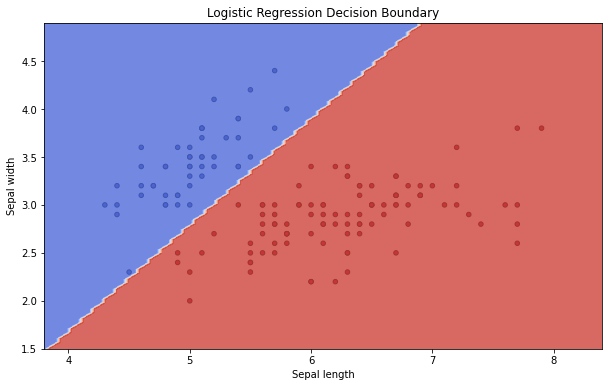

In [ ]:
# Visualize decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Decision Boundary')
plt.show()